In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%precision 3
%matplotlib inline

모집단 영업사원 5명의 근무년수가 6, 2, 4, 8, 10 이라고 하자. 

이 모집단의 평균과 분산을 구하면 다음과 같다.

In [4]:
x = [6, 2, 4, 8, 10]
print('모평균=',np.mean(x), '모분산=', np.var(x))

모평균= 6.0 모분산= 8.0


모집단에서 복원추출 가능한 n=2인 모든 표본과 표본평균을 계산해 보자.

In [16]:
from itertools import product

n = 2 # 샘플의 크기
S = set(product([6, 2, 4, 8, 10], repeat = n)) # 가능한 모든 샘플
mean = [np.mean(s) for s in S] # 표본의 평균

In [21]:
np.mean(mean) # 표본평균의 평균 = 모평균과 동일

6.000

In [22]:
np.var(mean) # 표본평균 분산 = 모분산/표본크기 와 동일

4.000

* 표본평균의 평균 : 여기서 관찰할 수 있는 사항은 모든 가능한 25개 표본평균의 전체 평균은 모평균과 같다는 것이다. 이 사실을 표본평균은 모평균의 비편향추정량(unbiased estimator)이라고 한다. 
* 표본평균의 분산 : 표본평균의 분산은 모분산을 표본의 크기(n=2)로 나눈 값임을 알 수 있다. 이는 모분산과는 다른 값이다. (8 / 2 = 4)

### 정규분포 표본평균의 분포

 n=10일 때 $X_1, X_2, ...X_10 \thicksim N(1,2)$의 표본평균인 $\bar{X}$의 분포는 다음과 같다.  
이때 $\bar{X}$의 평균은 모평균과 동일한 1이고, 분산은 모분산을 데이터의 갯수로 나눈 $\dfrac{2}{10}$이다.

In [23]:
mean = 1
var = 2
rv = stats.norm(mean, np.sqrt(var))

n = 10
sample_size = int(1e6)
Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis=0)

np.mean(sample_mean), np.var(sample_mean)

(1.000, 0.201)

모집단이 정규분포일 경우 표본평균 $\bar{X}$도 정규분포가 된다. 

$$ \bar{X} \thicksim N\left(\mu, \dfrac{\sigma^2}{n}\right)$$


$\bar{X}$로부터 무작위 추출한 표본 데이터의 히스토그램과 밀도함수를 그려보면 다음과 같다.

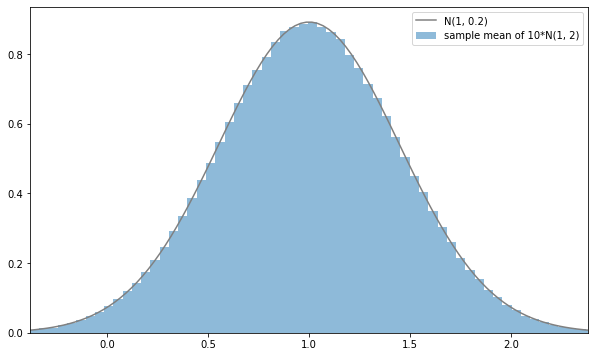

In [24]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv_true = stats.norm(mean, np.sqrt(var/n))
xs = np.linspace(rv_true.isf(0.999), rv_true.isf(0.001), 100)
ax.hist(sample_mean, bins=100, density=True,
        alpha=0.5, label='sample mean of 10*N(1, 2)')
ax.plot(xs, rv_true.pdf(xs), label='N(1, 0.2)', color='gray')

ax.legend()
ax.set_xlim(rv_true.isf(0.999), rv_true.isf(0.001))
plt.show()


## 중심극한정리, CLT

만일 모집단에서 표본크기(n)가 충분히 크면 모집단이 어떠한 분포라도 표본평균의 분포는 근사적으로 정규분포임을 보일 수 있다.   
즉 모집단의 분포와 상관없이 큰 표본들의 “표본평균의 분포"가  정규분포로 수렴한다는 점을 이용하면 확률을 손쉽게 구할 수 있다. 

### 이항분포의 정규 근사
다음과 같은 이항분포 B(n, 0.5) 에서 표본의 크기 n이 커짐에 따라 근사적으로 평균이 np, 분산이 np(1-p)인 정규분포 N(np, np(1-p))를 따른다.

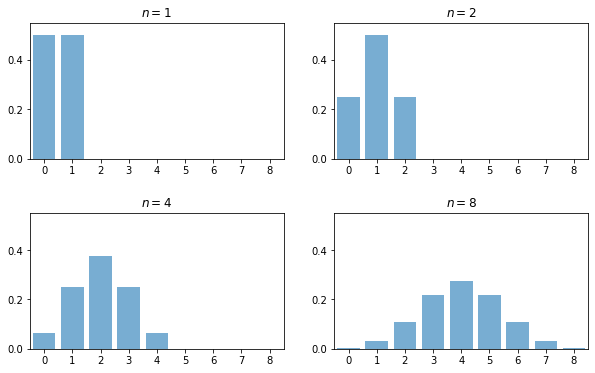

In [31]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
plt.subplots_adjust(hspace=0.4)
axes = axes.flatten()
ns = [1, 2, 4, 8]
dom = list(range(9))

for ax, n in zip(axes, ns):
    b = stats.binom(n, 0.5)
    ax.bar(dom, b.pmf(dom), alpha=0.6, align='center')
    ax.set(xlim=(-0.5, 8.5), ylim=(0, 0.55),
           xticks=list(range(9)), yticks=(0, 0.2, 0.4),
           title=f'$n = {n}$')

plt.show()

#### 포아송분포의 표본평균의 분포
n = 10000 이고 $X_1, X_2...X_{10000} \thicksim Poi(3) $이라고 할 때 표본평균의 분포를 생각해보자. 

In [27]:
l = 3
rv = stats.poisson(l)

n = 10000
sample_size = 1000
Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis=0)

rv_true = stats.norm(l, np.sqrt(l/n))
xs = np.linspace(rv_true.isf(0.999), rv_true.isf(0.001), 100)

중심극한정리에 의해 $\bar{X}$는 근사적으로 $N\left(3, \dfrac{3}{10000}\right)$을 따른다. 

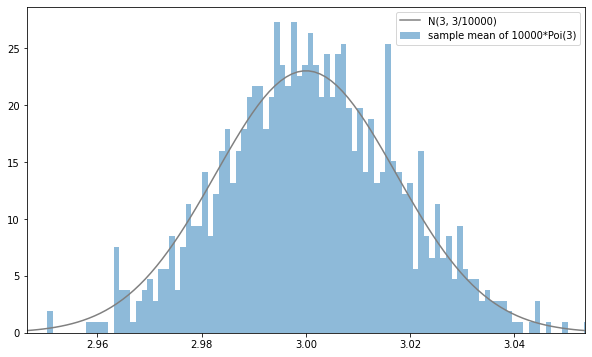

In [29]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.hist(sample_mean, bins=100, density=True,
        alpha=0.5, label='sample mean of 10000*Poi(3)')
ax.plot(xs, rv_true.pdf(xs), label='N(3, 3/10000)', color='gray')
ax.legend()
ax.set_xlim(rv_true.isf(0.999), rv_true.isf(0.001))
plt.show()

## 표본평균의 분포와 t-분포

앞서 설명한 중심극한정리에서 표본의 크기가 충분히 큰 경우는 모집단이 정규분포를 따르지 않는다고 해도 표본평분의 분포는 근사적으로 정규분포를 따른다. 이 경우 모분산 $\sigma^2$ 을 모른다면 이를 표본에서 구한 표본분산 $S^2$으로 대체 함으로써 표본평균의 분포를 파악할 수 있다.

표준화된 표본 평균의 확률분포는 t분포를 따른다.

## t분포

자유도가 10인 

In [35]:
n = 10  #자유도
rv1 = stats.norm()
rv2 = stats.chi2(n)

sample_size = int(1e6)
Z_sample = rv1.rvs(sample_size)
chi2_sample = rv2.rvs(sample_size)

t_sample = Z_sample / np.sqrt(chi2_sample/n)

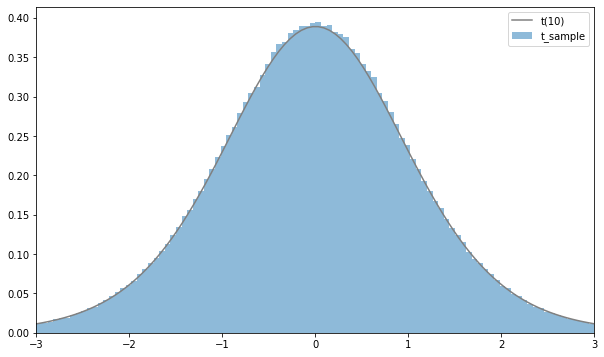

In [36]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.t(n)
xs = np.linspace(-3, 3, 100)
ax.hist(t_sample, bins=100, range=(-3, 3),
        density=True, alpha=0.5, label='t_sample')
ax.plot(xs, rv.pdf(xs), label=f't({n})', color='gray')

ax.legend()
ax.set_xlim(-3, 3)
plt.show()

#### t-분포의 특징

t분포는 자유도에 의해 결정되는 분포이다. 따라서 t분포에는 반드시 자유도가 명시되어야 한다. 표준정규분포와 t분포의 자유도에 따른 형태는 다음 그래프와 같다.

* 좌우대칭의 분포이다.
* 표준정규분포에 비해 양쪽 꼬리가 두껍다.
* 자유도가 커질수록 표준정규분포에 가깝다.


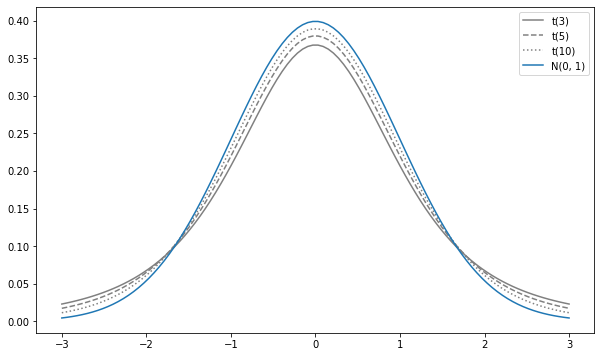

In [42]:
linestyles = ['-', '--', ':']
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(-3, 3, 100)
for n, ls in zip([3, 5, 10], linestyles):
    rv = stats.t(n)
    ax.plot(xs, rv.pdf(xs),
            label=f't({n})', ls=ls, color='gray')
rv = stats.norm()
ax.plot(xs, rv.pdf(xs), label='N(0, 1)')
    
ax.legend()
plt.show()

자유도 n-1=5 인 t-분포에서 상위 0.05(5%) 지점의 값을 확인하려면 isf 메소드를 사용한다.

In [ ]:
rv = stats.t(5)
rv.isf(0.05)

2.0150483726691575